In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


In [20]:
df_posts = pd.read_csv('../data/senti_posts.zip').drop(6161) # bad row
df_posts['timestamp'] = pd.to_datetime(df_posts['timestamp'])
df_posts['score'] = pd.to_numeric(df_posts['score'])

In [24]:
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53187 entries, 0 to 53187
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   title       53181 non-null  object        
 1   score       53187 non-null  int64         
 2   id          53187 non-null  object        
 3   url         53187 non-null  object        
 4   comms_num   53187 non-null  float64       
 5   created     53187 non-null  float64       
 6   body        24606 non-null  object        
 7   timestamp   53186 non-null  datetime64[ns]
 8   sent_label  53186 non-null  object        
 9   sent_score  53186 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 4.5+ MB


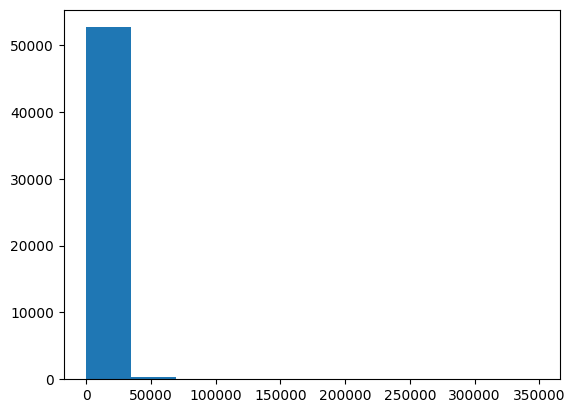

In [23]:
fig, ax = plt.subplots(1,1)
ax.hist(df_posts['score']);

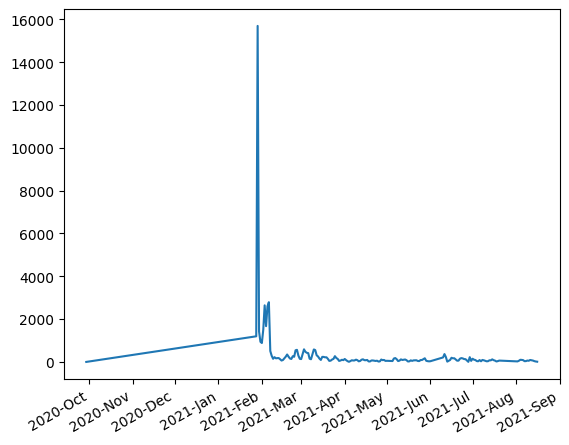

In [82]:
date_c = df_posts.groupby('date').size().to_frame('size').reset_index()
date_c['date'] = pd.to_datetime(date_c['date'])

fig, ax = plt.subplots(1,1)

ax.plot(date_c['date'], date_c['size'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

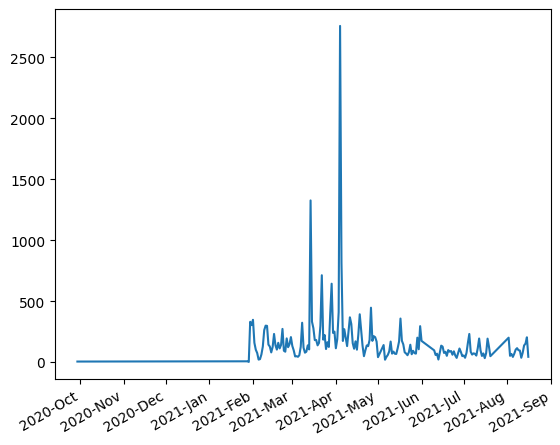

In [91]:
score_m = df_posts.groupby('date')['score'].agg(np.median).to_frame().reset_index()

score_m['date'] = pd.to_datetime(score_m['date'])

fig, ax = plt.subplots(1,1)

ax.plot(score_m['date'], score_m['score'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right');

In [55]:
df_posts['date'] = df_posts['timestamp'].dt.strftime('%Y-%m-%d')
sent_date = df_posts.groupby(['date', 'sent_label']).size().to_frame('size').reset_index()\
            .pivot(index='date',columns='sent_label', values='size').reset_index().fillna('0')

sent_date['date'] = pd.to_datetime(sent_date['date'])
sent_date[['negative', 'positive']] = sent_date[['negative', 'positive']].astype('int32')

In [56]:
sent_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      177 non-null    datetime64[ns]
 1   negative  177 non-null    int32         
 2   positive  177 non-null    int32         
dtypes: datetime64[ns](1), int32(2)
memory usage: 2.9 KB


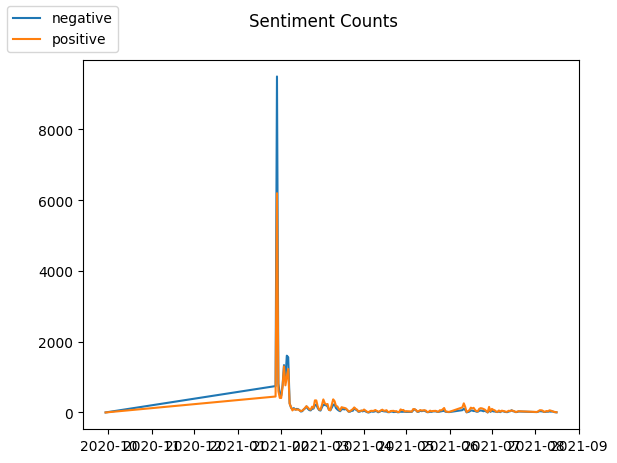

In [61]:
fig, ax = plt.subplots(1, 1)
for col in ['negative', 'positive']:
    ax.plot(sent_date['date'], sent_date[col], label=col)

fig.legend(loc='upper left')
fig.suptitle('Sentiment Counts');

In [58]:
sent_date[sent_date['negative']==np.max(sent_date['negative'])]

sent_label,date,negative,positive
2,2021-01-29,9496,6197


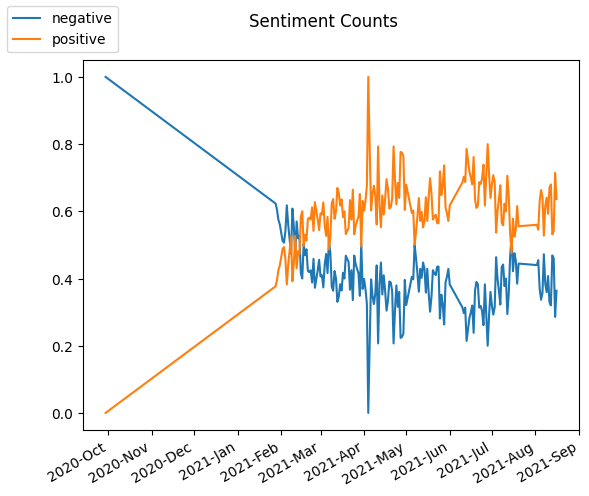

In [80]:
sent_date['tot'] = sent_date['negative'] + sent_date['positive']
sent_date['negative'] = sent_date['negative']/sent_date['tot']
sent_date['positive'] = sent_date['positive']/sent_date['tot']

fig, ax = plt.subplots(1, 1)
for col in ['negative', 'positive']:
    ax.plot(sent_date['date'], sent_date[col], label=col)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
fig.legend(loc='upper left')
fig.suptitle('Sentiment Counts');

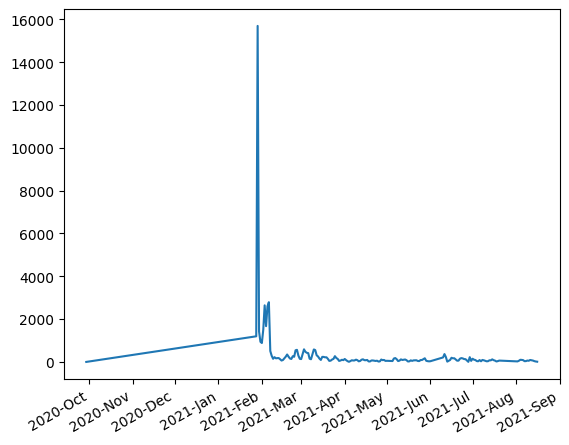